In [62]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [63]:
data=pd.read_csv('Admission_Predict.csv')

In [64]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [65]:
data=data.drop(columns='Serial No.')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [66]:
data['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [67]:
y=[1 if each>0.85 else 0 for each in data['Chance of Admit ']]

In [68]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [69]:
x=data.iloc[:,:-1]

In [70]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Text(0.5, 0, 'Chance of admit')

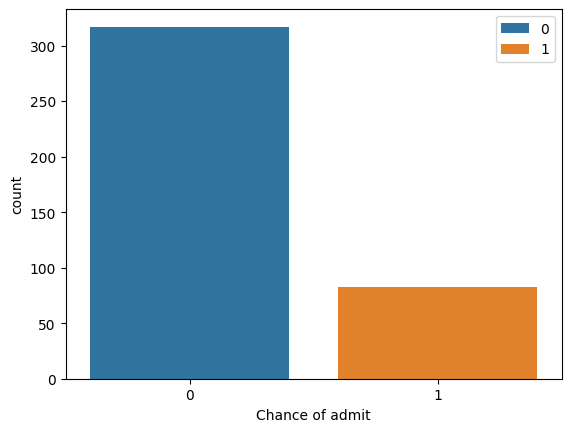

In [72]:
sns.countplot(x=y,hue=y)
plt.xlabel('Chance of admit')

In [73]:
model=DecisionTreeClassifier().fit(x_train,y_train)
model

DecisionTreeClassifier()

In [74]:
y_predict=model.predict(x_test)

In [75]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

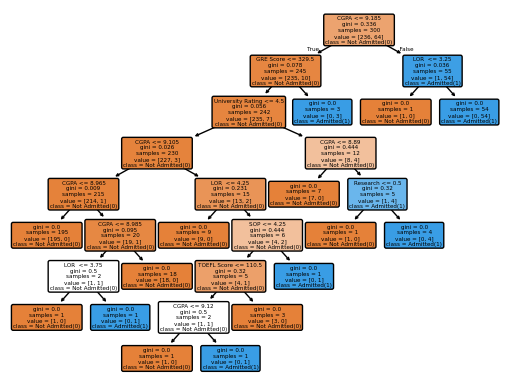

<Figure size 1600x1600 with 0 Axes>

In [76]:
tree.plot_tree(model,filled=True,feature_names=x_train.columns,class_names=['Not Admitted(0)','Admitted(1)'],rounded=True)
plt.figure(figsize=(16,16))
plt.show()

In [77]:
for i in range(len(y_predict)):
    pred=model.predict(x_test.iloc[[i]])
    if pred<1:
        print('Student not Admitted')
    else:
        print('Admitted')

Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Admitted
Admitted
Student not Admitted
Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Admitted
Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Admitted
Student not Admitted
Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Student not Admitted
Stud

In [78]:
print(model.predict([[337,118,4,4.5,4.5,9.65,1]]))
sample=model.predict([[337,118,4,4.5,4.5,9.65,1]])
if sample==0:
    print('Not Admitted')
else:
    print('Admitted')

[1]
Admitted


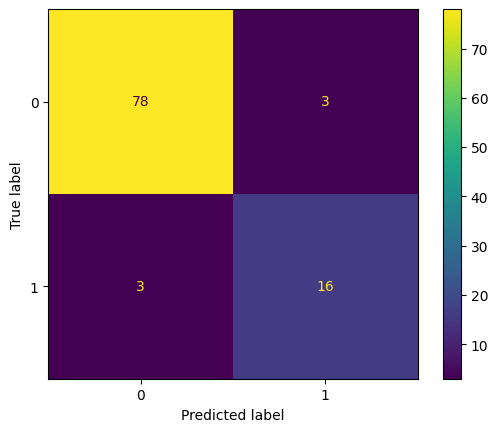

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [80]:
A=x.iloc[[399]]

In [81]:
A_pred=model.predict(A)
if A_pred==0:
    print('Not Admit')
else:
    print('Admit')

Admit


In [82]:
model_g=DecisionTreeClassifier(criterion='gini').fit(x_train,y_train)

In [83]:
model_g

DecisionTreeClassifier()

In [84]:
y_pred=model_g.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

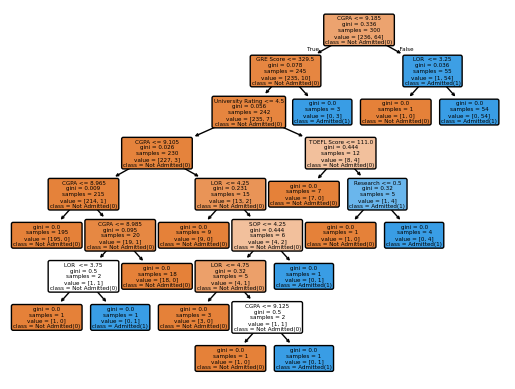

In [85]:
tree.plot_tree(model_g,filled=True,feature_names=x_train.columns,class_names=['Not Admitted(0)','Admitted(1)'],rounded=True)
plt.show()

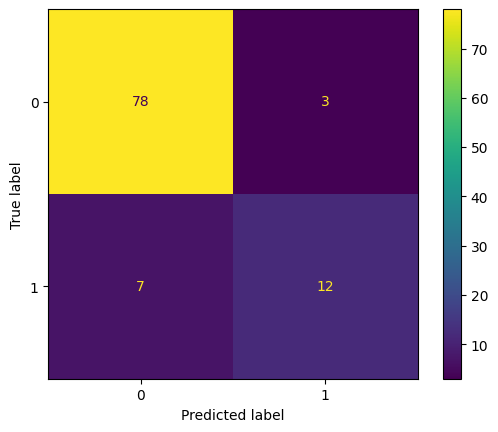

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [87]:
accuracy_score(y_test,y_pred)

0.9

In [89]:
for i in range(len(y_pred)):
    p=model.predict(x_test.iloc[[i]])
    if (p<1):
        print('Not admit')
    else:
        print('Admit')


Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Admit
Not admit
Admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Not admit
Admit
Not admit
Not admit
Admit
Not admit
Not admit
Not admit
Not admit
Not admit


In [90]:
S=x.iloc[[399]]

In [91]:
B=model.predict(S)
if B<1:
    print('not admit')
else:
    print('admit')

admit
